

# Project: Investigate the No-Show appointments Data set


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>I have choose the No-Show appointmens data set for this project and i have analize it and made of it a 5 quistions that i would answering them in the project .

>1- how many appointments that the pationt showed up or missed it ?

>2- the most Neighbourhood of hospital that the pationt have showed for appointments ?

>3- What’s the relationship between gender and hypertension ?

>4- the avarge of who had received SMS and showed to thier appointments or not ?

>5- the pircentage of the Gender for not showed pationt ?
 

In [1]:
# import statements for all of the packages that i
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# here i just changed the Noshow column name and delete the dash for easy to use
df.rename({'No-show': 'Noshow'}, axis=1 , inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


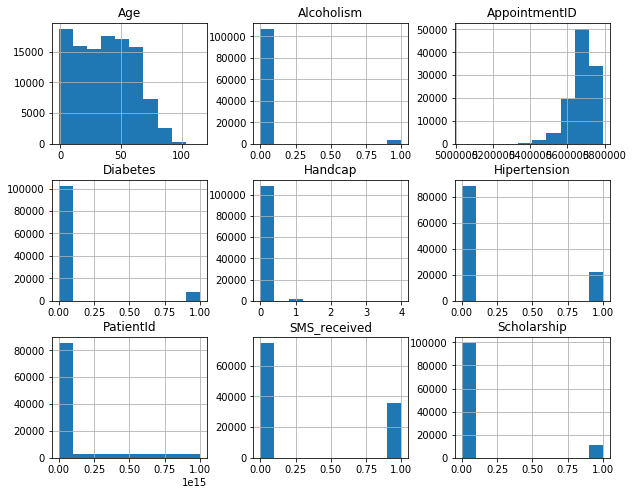

In [6]:
df.hist(figsize= (10,8));

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [8]:
sum(df.duplicated())


0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
Noshow            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Noshow            0
dtype: int64

Sense the data set is complete and doesn't have any null values we are ready to start analize .

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : how many appointments that the pationt showed up or missed it ?

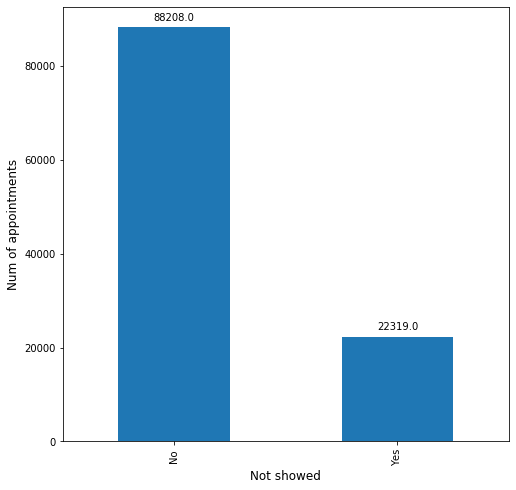

In [11]:
# The first Q1
axx=df.Noshow.value_counts().plot(kind='bar',figsize=(8,8))
axx.set_xlabel("Not showed",fontsize=12)
axx.set_ylabel("Num of appointments",fontsize=12)
def add_value_labels(ax, spacing=5):
   
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there. 
# i used "https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart" to made this 
add_value_labels(axx)


the number of of appointmens that the pationts is showed for it is larger than the not showed by a signficant amount 

In [12]:
# here we will seperate the data into two Data frames for showing or not showing
# this one for not showed appointments
df_n = df[df['Noshow'] == 'Yes']
# and this for appointments who had showed
df_y = df[df['Noshow'] == 'No']


### Research Question 2 : the most Neighbourhood of hospital that the pationt have showed for appointments ?

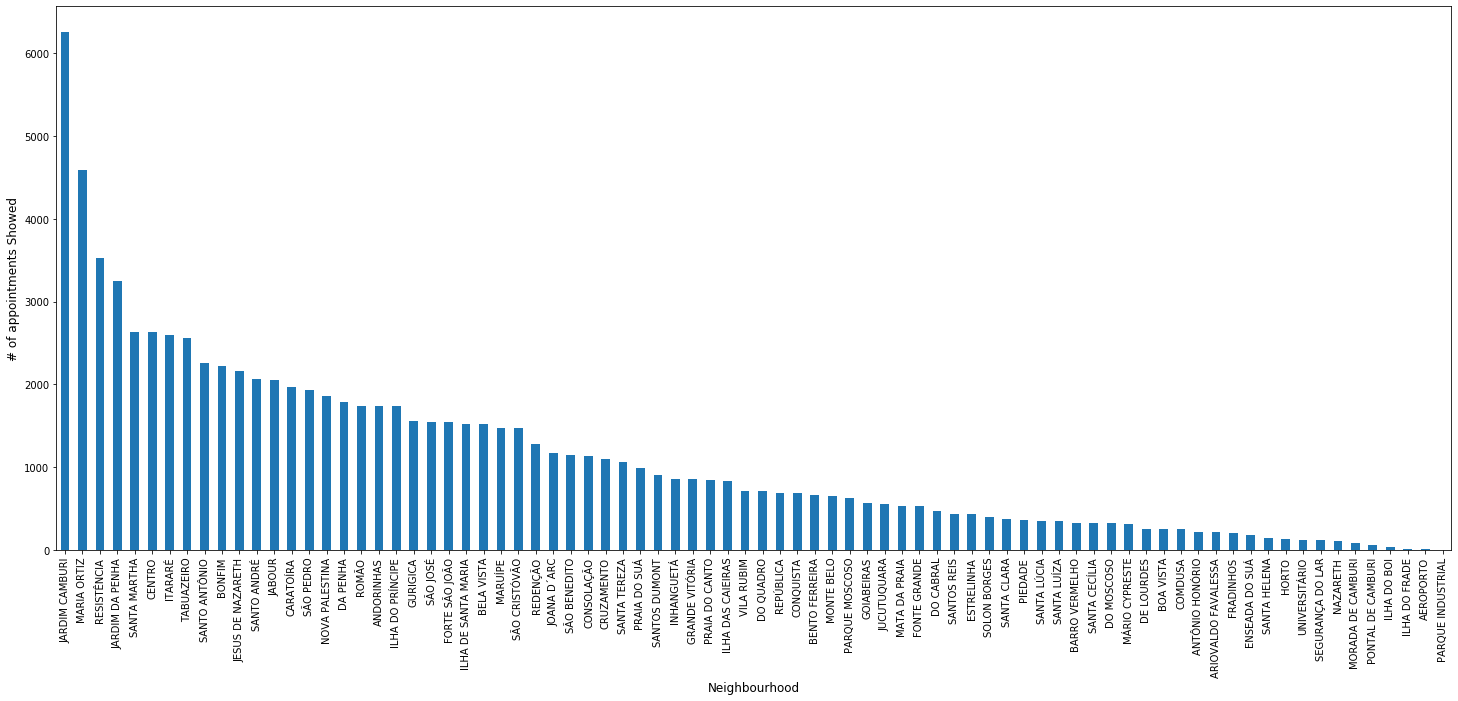

In [13]:
# Q2
axx=df_y.Neighbourhood.value_counts().plot(kind='bar',figsize=(25,10))
axx.set_xlabel("Neighbourhood",fontsize=12);
axx.set_ylabel("# of appointments Showed",fontsize=12);


As we can see the most Neighbourhood is Jardim Camburi

### Research Question 3 :What’s the relationship between gender and hypertension  ?

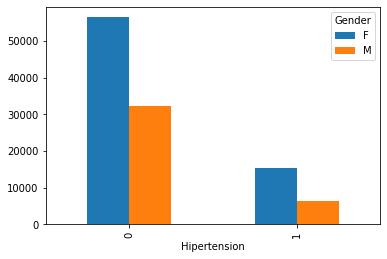

In [14]:
# Q3
pd.crosstab(df['Hipertension'], df['Gender']).plot(kind='bar', stacked=False);

Here we can see Which Gender has more Hipertension and which not .

### Research Question 4 : the avarge of who had received SMS and showed to thier appointments or not ?

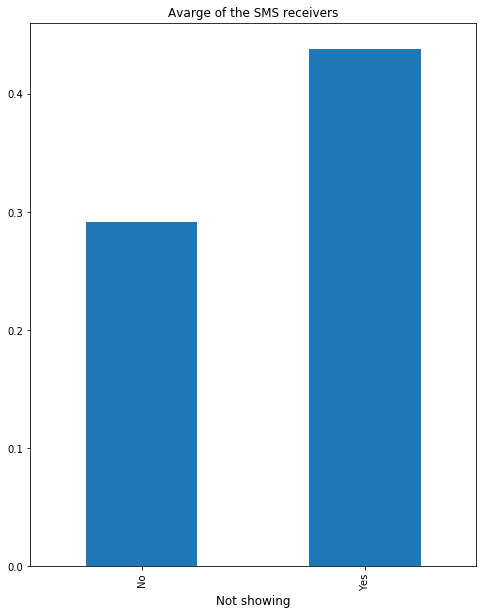

In [15]:
# Q4

axx=df.groupby('Noshow')['SMS_received'].mean().plot(kind='bar',figsize=(8,10),title='Avarge of the SMS receivers');
axx.set_xlabel("Not showing",fontsize=12);



here we find out that who recived SMS are more likely to miss the appointment.

### Research Question 5 : the pircentage of the Gender for not showed pationt ?

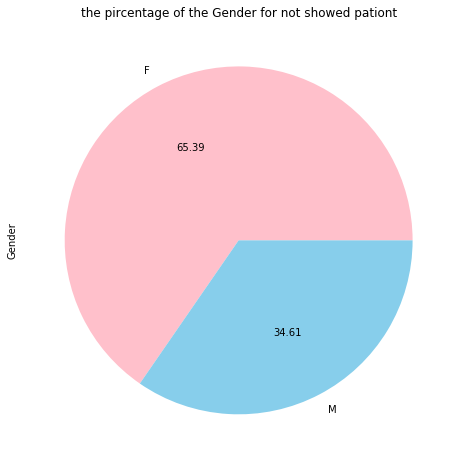

In [16]:
# Q5
# i used a t1 as a title just to simplify the code 
t1 = 'the pircentage of the Gender for not showed pationt'
# df_n is a dataframe for not showing appointments 
axx=df_n.Gender.value_counts().plot(kind='pie',figsize=(8,8),colors=['pink','skyblue'],title=t1,autopct='%.2f')
# i used have https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct


As we can see in the pie chart that 65.39% are female and 34.61% are male for Not showed appointments

<a id='conclusions'></a>
## Conclusions

>Finally i had some quistions in the data set that i was curiosity about but now it is clear for me like the amount of appointmens are missed or showed , the most neighborhood who has most showed appointments , we can see the relationship between gender and hypertension , also we find out that who recived SMS are more likely to miss the appointment,
in last one we find out the pircentage of each gender for the pationts that are not showed for the appointments .




## Limitations

> I think if the appointment had more information about it would be better may include names or which section of hospital. 
there was some difficulty with visualiztion with matplot for me and how to choose the right plot for visulize the data but another than that it was good . 